In [1]:
import my_methods as mm
import pandas as pd
import numpy as np
import datetime as dt

# roeq
Income before extraordinary items divided by lagged common shareholders’ equity.  
Shareholder equity is equal to a firm's total assets minus its total liabilities.  
Common shareholder equity = shareholder equity - 优先股 - 库存股

In [2]:
# B001100000 [营业总收入] - 企业经营过程中所有收入之和.
df = pd.read_csv('../../Data/raw_data/14利润表/FS_Comins.csv')
df = df[df['Typrep'] == 'A' ]
df = df[df['Stkcd'].map(lambda x: (0<=x and x<=9999) or (600000<=x and x<=609999))]
df['Accper'] = pd.DatetimeIndex(df['Accper'])

In [3]:
income = df.pivot_table(values='B001100000', index='Accper', columns='Stkcd')

In [5]:
# A003000000 [所有者权益合计]。
# A003112101 [其中：优先股] - 优先股是相对于普通股而言的。主要指在利润分红及剩余财产分配的权利方面，优先于普通股。2015年起使用。
# A003102101 [其中：库存股] - 企业收购、转让或注销的本公司股份金额。2007年起使用。
df = pd.read_csv('../../Data/raw_data/16资产负债表/FS_Combas.csv')
df = df[df['Typrep'] == 'A' ]
df = df[df['Stkcd'].map(lambda x: (0<=x and x<=9999) or (600000<=x and x<=609999))]
df['Accper'] = pd.DatetimeIndex(df['Accper'])

In [6]:
she = df.pivot_table(values='A003000000', index='Accper', columns='Stkcd')
pfr_she = df.pivot_table(values='A003112101', index='Accper', columns='Stkcd')
trr_she = df.pivot_table(values='A003102101', index='Accper', columns='Stkcd')

In [10]:
pfr_she = pfr_she.replace(np.nan, 0)
trr_she = trr_she.replace(np.nan, 0)

In [11]:
cmn_she = she - pfr_she - trr_she
cmn_she = cmn_she.replace(0, np.nan)

In [12]:
roeq = income / cmn_she.shift(3) # 3个月即1个季度

In [14]:
roeq

Stkcd,1,2,3,4,5,6,7,8,9,10,...,605500,605507,605555,605567,605577,605580,605588,605589,605598,605599
Accper,,,,,,,,,,,,,,,,,,,,,
1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,0.112954,0.205735,NaN,0.024992,0.028090,0.123063,0.078691,0.021080,0.289943,0.279310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,0.223242,0.477672,NaN,0.063846,0.122767,0.188016,0.810478,0.082067,0.607630,0.689715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
roeq.to_csv('../../Data/factors/roeq.csv')

# roaq
 Income before extraordinary items divided by one quarter lagged total assets.

In [15]:
# B001100000 [营业总收入] - 企业经营过程中所有收入之和.
df = pd.read_csv('../../Data/raw_data/14利润表/FS_Comins.csv')
df = df[df['Typrep'] == 'A' ]
df = df[df['Stkcd'].map(lambda x: (0<=x and x<=9999) or (600000<=x and x<=609999))]
df['Accper'] = pd.DatetimeIndex(df['Accper'])
income = df.pivot_table(values='B001100000', index='Accper', columns='Stkcd')

In [16]:
# A001000000 [资产总计] - 资产各项目之总计。1990年起使用
df = pd.read_csv('../../Data/raw_data/16资产负债表/FS_Combas.csv')
df = df[df['Typrep'] == 'A']
df = df[df['Stkcd'].map(lambda x: (0<=x and x<=9999) or (600000<=x and x<=609999))]
df['Accper'] = pd.DatetimeIndex(df['Accper'])

tta = df.pivot_table(values='A001000000', index='Accper', columns='Stkcd')

In [17]:
roaq = income / tta.shift(3)
roaq

Stkcd,1,2,3,4,5,6,7,8,9,10,...,605500,605507,605555,605567,605577,605580,605588,605589,605598,605599
Accper,,,,,,,,,,,,,,,,,,,,,
1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-06-30,0.091291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-31,0.093667,1.906870,1.734267,1.579184,NaN,NaN,NaN,NaN,1.476175,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,0.008804,0.034315,NaN,0.023594,0.016386,0.059621,0.027517,0.012171,0.117962,0.050706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,0.017195,0.089403,NaN,0.059487,0.066283,0.095477,0.150804,0.041158,0.252642,0.158961,...,0.540858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
roaq.to_csv('../../Data/factors/roaq.csv')

# divo
A dummy variable that equals to 1 if company does not pay dividends this year but did
in prior year.

# divi
 A dummy variable that equals to 1 if company pays dividends this year but did not in
prior year.

# dy
Total dividends divided by market capitalization at year end.

# acc
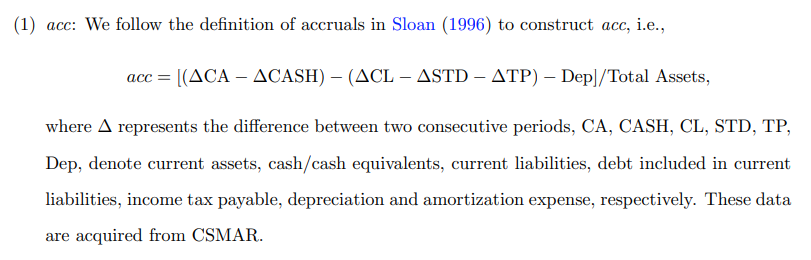

# absacc
Absolute value of acc

# pctacc
 Same as acc except that the numerator is divided by the absolute value of net income; if
net income = 0 then net income set to 0.01 for denominator.

# stdacc
Standard deviation of 16 quarters of accruals from month t − 16 to t − 1.

# salerev
Quarterly sales divided by accounts receivable.

# chemp_ia
 Industry-adjusted change in the number of employees.

# chpm_ia
 Industry-adjusted change in income before extraordinary items scaled by sales.

# chtx
 Percentage change in taxes from quarter t − 1 to t.

# cash
Cash and cash equivalents divided by average total assets.

# roic
Quarterly earnings before interest and taxes minus nonoperating income divided by non-cash enterprise value.

# chpm
Change in income before extraordinary items scaled by sales.

# stdcf
 Standard deviation for 16 quarters of net cash flows divided by sales. 

# saleinv
Quarterly sales divided by total inventory. 

# operprof
Quarterly operating profit divided by lagged common shareholders’ equity. 

# pchsale_pchrect
Quarterly percentage change in sales minus quarterly percentage change in
receivables.

# salecash
Quarterly sales divided by cash and cash equivalents.

# tb
 Tax income, defined as current tax expense divided by enterprise income tax rate in China
(25%), divided by total income.

# gma
 Revenue minus cost of goods sold divided by lagged total assets.

# pchdepr
Percentage change in depreciation.

In [19]:
# 这张表的csv文件也有问题，故改用excel
df1 = pd.read_excel('../../Data/raw_data/19固定资产、累计折旧、减值准备/FN_Fn020.xlsx')
df2 = pd.read_excel('../../Data/raw_data/19固定资产、累计折旧、减值准备/FN_Fn0201.xlsx')
df = pd.concat([df1, df2])

In [20]:
df = df[df['Stkcd'].map(lambda x: x.startswith('00') or x.startswith('60'))]
df['Stkcd'] = df['Stkcd'].map(lambda x: int(x))
# Typrep [报表类型] - 1、合并会计报表；2、母公司会计报表
df = df[df['Typrep'] == 1]
# Fn02001 [科目类型] - 1、原值；2、累计折旧；3、净值；4、减值准备；5、净额
df = df[df['Fn02001'] == 2]
df['Accper'] = pd.DatetimeIndex(df['Accper'])
# Fn02013 [期末余额] - 固定资产的期末余额
df['Fn02013'] = df['Fn02013'].map(lambda x: float(x))

In [21]:
depr = df.pivot_table(values='Fn02013', index='Accper', columns='Stkcd')

In [22]:
pct_depr = depr.pct_change()
pct_depr = pct_depr.replace(0,np.nan)
pct_depr

Stkcd,1,2,4,5,6,7,8,9,10,11,...,605368,605369,605376,605377,605378,605388,605389,605398,605399,605500
Accper,,,,,,,,,,,,,,,,,,,,,
2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,0.151623,0.091252,0.288347,-0.181807,0.112864,0.205996,-0.292753,0.442688,0.060577,-0.105731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31,0.184112,0.136185,-0.096321,0.105695,-0.752710,0.147035,-0.252870,0.132785,-0.726732,0.025143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,0.144429,0.426870,0.242017,0.103371,-0.103521,0.140978,0.256613,0.176384,-0.036585,0.140631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,0.019992,0.469185,0.264614,-0.445584,-0.618505,-0.181232,-0.723933,0.145450,-0.385262,-0.205138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,0.028768,-0.009346,-0.038333,-0.014637,0.276940,-0.376263,0.027725,-0.046323,0.073083,-0.283597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-31,0.131895,0.088253,-0.071852,0.279717,0.034254,0.097755,-0.473910,0.068196,0.163406,0.080583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,-0.023113,0.171806,0.086013,0.022092,0.212756,-0.036253,0.085331,0.050750,0.167870,-0.067587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,1.571419,0.155005,0.170968,-0.525143,-0.630049,0.022401,0.061385,-0.030108,0.114733,0.103352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pct_depr.to_csv('../../Data/factors/pchdepr.csv')

# nincr
Number of consecutive quarters (up to eight quarters) with an increase in earnings

In [24]:
ern = mm.extract_variable_oneFile(filePath='../../Data/raw_data/04财务指标分析/FI_T5.csv',
                               time_col="Accper",
                               code_col="Stkcd",
                               variable="F050701B")
ern

Stkcd,1,2,3,4,5,6,7,8,9,10,...,605500,605507,605555,605567,605577,605580,605588,605589,605598,605599
Accper,,,,,,,,,,,,,,,,,,,,,
1991-12-31,NaN,NaN,3.141388e+07,1.045067e+07,NaN,NaN,NaN,NaN,7.887841e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.025752e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700862e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-31,NaN,1.974686e+08,1.695856e+08,5.683820e+07,7.382582e+07,6.021410e+07,3.267532e+07,1.254927e+07,4.776455e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,NaN,5.506278e+10,NaN,2.368664e+07,-2.051193e+08,7.224289e+08,-1.146474e+08,-5.330271e+08,9.661907e+08,5.171637e+07,...,1.477102e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,2.094749e+09,NaN,8.532131e+05,1.412344e+07,2.026664e+08,-4.665167e+05,-1.488084e+07,2.154437e+08,5.487553e+06,...,3.168859e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,1.995665e+10,NaN,7.392478e+05,2.077249e+08,6.329417e+08,-2.129888e+06,-2.075478e+07,7.674115e+08,2.255831e+07,...,1.117810e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def consec_count(s):
    i = 0
    for x in s[::-1]:
        if x == True:
            i += 1
        else:
            break
    return i

In [29]:
ern = ern.applymap(lambda x: x>0)
nincr = ern.rolling(window=8).apply(consec_count)
nincr

Stkcd,1,2,3,4,5,6,7,8,9,10,...,605500,605507,605555,605567,605577,605580,605588,605589,605598,605599
Accper,,,,,,,,,,,,,,,,,,,,,
1991-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,0.0,8.0,0.0,2.0,0.0,8.0,0.0,0.0,8.0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-31,0.0,8.0,0.0,3.0,1.0,8.0,0.0,0.0,8.0,8.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30,0.0,8.0,0.0,4.0,2.0,8.0,0.0,0.0,8.0,8.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
nincr.to_csv('../../Data/factors/nincr.csv')